<a href="https://colab.research.google.com/github/jinburge/Congressional-Analytics/blob/main/V2_of_CP_Rec_Center_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Does Weather Influence the Congestion at the Cal Poly Rec Center?**

#### By Jin Burge (jbburge@calpoly.edu) and Athena Kwok (akwok01@calpoly.edu)

#### Feburary 28, 2023


## **Introduction**

The Cal Poly Rec Center is one of the main attractions of the beautiful campus and a popular destination for students. One of the only complaints about the facility is the over-crowdedness, possibly deterring students from entering. 

The weather in San Luis Obispo is known to be sunny and warm in the spring and summer, and cold and cloudy during the winter. This year, more extreme weather occurred from reaching a scorching 104 degrees Fahrenheit in early September to a brutal storm in early January. 


For our final project, we are interested in how weather influences the congestion at the Cal Poly Rec Center. After contacting Cal Poly ASI, we were provided with gate entry statistics at the recreation center. Although we desired to obtain multiple years of data to analyze these trends, Covid restrictions from the year prior would not give us an accurate depiction of entry patterns. Therefore, we were limited with the amount of data given and are using gate entry statistics from *September 12, 2022 to February 20, 2023*. 


Given the data provided, we speculate that students would be more motivated to use the recreation center when the weather is colder. When the weather is warmer, we imagine that there are more alternative activities that students would partake in, such as going to the beach, hiking on trails, or playing outdoor sports. Contrastingly, when the temperature is lower (or possibly even rainy), students will feel confined indoors and will not have as many options for activities. 





Thus, our hypothesis is that *in general, a decrease in temperature, and an increase in rain, is correlated with an increase in the number of people who use the Cal Poly Rec Center*.




## **Scrape Weather Data**

In [ ]:
# Reading in Libraries
import pandas as pd 
from pandas.tseries.offsets import BDay
import json 
from urllib.request import urlopen 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from meteostat.interface.hourly import Hourly
from meteostat import Hourly

#### **Daily Average Temperature and Precipitation** #####

In [ ]:
# Set time period
start = datetime(2022, 9, 12)
end = datetime(2023, 2, 20)

# Create Point for San Luis Obispo
location = Point(35.2827524, -120.680656)

# Get daily data for 9/12/22 to 2/20/23
data = Daily(location, start, end)
data = data.fetch()

# Extract only average temperature 
cols = ["time", "tavg", "prcp"]
weather_df = pd.DataFrame(data, columns = cols)

# Convert degrees Celsius to Fahrenheit
weather_df["Average Temperature (F)"] = 1.8*weather_df["tavg"] + 32


In [ ]:
from google.colab import drive
drive.mount('drive')

weather_df.to_csv('df.csv')
!cp df.csv "drive/My Drive/"

Mounted at drive


In [ ]:
url = 'https://raw.githubusercontent.com/jinburge/FinalProject/main/daily_rain.csv'
daily_weather = pd.read_csv(url)


daily_weather


,time,tavg,prcp
0,2022-09-12,69.44,0.0
1,2022-09-13,66.20,0.0
2,2022-09-14,65.12,0.0
3,2022-09-15,64.58,0.0
4,2022-09-16,64.40,0.0
...,...,...,...
157,2023-02-16,45.14,0.0
158,2023-02-17,48.02,0.0
159,2023-02-18,51.98,0.0
160,2023-02-19,53.60,0.0


#### **Hourly Average Temperature and Precipitation** ####

In [ ]:
# Set time period
start = datetime(2022, 9, 12)
end = datetime(2023, 2, 20)

# Create Point for San Luis Obispo
location = Point(35.2827524, -120.680656)

# Get daily data for 9/12/22 to 2/20/23
data = Hourly(location, start, end)
data = data.fetch()

# Extract only average temperature 
cols = ["temp", "prcp"]
hourly_weather = pd.DataFrame(data, columns = cols)

# Convert degrees Celsius to Fahrenheit
hourly_weather["temp"] = 1.8*hourly_weather["temp"] + 32

In [ ]:
url = 'https://raw.githubusercontent.com/jinburge/FinalProject/main/hourly_weather.csv'
hourly_weather = pd.read_csv(url)

hourly_weather

,time,temp,prcp
0,2022-09-12 00:00:00,84.02,0.0
1,2022-09-12 01:00:00,84.02,0.0
2,2022-09-12 02:00:00,73.94,0.0
3,2022-09-12 03:00:00,73.94,0.0
4,2022-09-12 04:00:00,69.08,0.0
...,...,...,...
3860,2023-02-19 20:00:00,67.82,0.0
3861,2023-02-19 21:00:00,69.08,0.0
3862,2023-02-19 22:00:00,69.80,0.0
3863,2023-02-19 23:00:00,67.64,0.0


## **Import Cal Poly Rec Data**

#### **Daily Entrance Data** 

In [ ]:
url = 'https://raw.githubusercontent.com/jinburge/FinalProject/main/rec_daily2.csv'
cp_df = pd.read_csv(url)

# Select columns
cp_df = pd.DataFrame(cp_df)

cp_df

,Date,Entrances
0,2022-09-12,2066
1,2022-09-13,2410
2,2022-09-14,3047
3,2022-09-15,2656
4,2022-09-16,3217
...,...,...
157,2023-02-16,4630
158,2023-02-17,3350
159,2023-02-18,2035
160,2023-02-19,2158


#### **Hourly Entrance Data** 

In [ ]:
url = 'https://raw.githubusercontent.com/jinburge/FinalProject/main/rec_final_hour_24.csv'
hourly_rec = pd.read_csv(url) 

hourly_rec

,DateTime,Date,Hour,Entrances
0,2022-09-12 06:00:00,2022-09-12,6,56
1,2022-09-12 07:00:00,2022-09-12,7,67
2,2022-09-12 08:00:00,2022-09-12,8,68
3,2022-09-12 09:00:00,2022-09-12,9,94
4,2022-09-12 10:00:00,2022-09-12,10,148
...,...,...,...,...
1917,2023-02-20 19:00:00,2023-02-20,19,225
1918,2023-02-20 20:00:00,2023-02-20,20,202
1919,2023-02-20 21:00:00,2023-02-20,21,152
1920,2023-02-20 22:00:00,2023-02-20,22,74


### **Merging Datasets**

We created two merged datasets to combine entrance data with temperature and precipitation data: one on a daily basis and another on an hourly basis. This allows us to analyze the patterns and trends on various granularity levels. 

#### **Daily Weather and Entrances**

In [ ]:
merged_daily = pd.merge(cp_df, daily_weather, left_on='Date', right_on='time')

merged_daily

,Date,Entrances,time,tavg,prcp
0,2022-09-12,2066,2022-09-12,69.44,0.0
1,2022-09-13,2410,2022-09-13,66.20,0.0
2,2022-09-14,3047,2022-09-14,65.12,0.0
3,2022-09-15,2656,2022-09-15,64.58,0.0
4,2022-09-16,3217,2022-09-16,64.40,0.0
...,...,...,...,...,...
157,2023-02-16,4630,2023-02-16,45.14,0.0
158,2023-02-17,3350,2023-02-17,48.02,0.0
159,2023-02-18,2035,2023-02-18,51.98,0.0
160,2023-02-19,2158,2023-02-19,53.60,0.0


#### **Hourly Weather and Entrances**

In [ ]:
merged_hourly = pd.merge(hourly_weather, hourly_rec, left_on='time', right_on='DateTime')

merged_hourly

,time,temp,prcp,DateTime,Date,Hour,Entrances
0,2022-09-12 06:00:00,69.08,0.0,2022-09-12 06:00:00,2022-09-12,6,56
1,2022-09-12 07:00:00,69.08,0.0,2022-09-12 07:00:00,2022-09-12,7,67
2,2022-09-12 08:00:00,66.92,0.0,2022-09-12 08:00:00,2022-09-12,8,68
3,2022-09-12 09:00:00,64.94,0.0,2022-09-12 09:00:00,2022-09-12,9,94
4,2022-09-12 10:00:00,66.02,0.0,2022-09-12 10:00:00,2022-09-12,10,148
...,...,...,...,...,...,...,...
1898,2023-02-18 18:00:00,64.94,0.0,2023-02-18 18:00:00,2023-02-18,18,310
1899,2023-02-18 19:00:00,66.92,0.0,2023-02-18 19:00:00,2023-02-18,19,248
1900,2023-02-18 20:00:00,69.80,0.0,2023-02-18 20:00:00,2023-02-18,20,221
1901,2023-02-18 21:00:00,69.08,0.0,2023-02-18 21:00:00,2023-02-18,21,89


### **Data Preparation**

We created three sub-datasets for each merged dataset: one with all observations, one removing holidays, weekends, and when the rec center was closed, and one that further removes all non-rainy days (in addition to the breaks and closed days that were removed in the second dataset). 


#### **Merged Daily**

##### **All Data**

In [ ]:
# Drop columns
merged_daily = merged_daily.drop(columns = ["time"])

# Change column order
merged_daily = merged_daily[["Date", "tavg", "prcp", "Entrances"]]

# Final Dataset with Outliers
merged_daily

,Date,tavg,prcp,Entrances
0,2022-09-12,69.44,0.0,2066
1,2022-09-13,66.20,0.0,2410
2,2022-09-14,65.12,0.0,3047
3,2022-09-15,64.58,0.0,2656
4,2022-09-16,64.40,0.0,3217
...,...,...,...,...
157,2023-02-16,45.14,0.0,4630
158,2023-02-17,48.02,0.0,3350
159,2023-02-18,51.98,0.0,2035
160,2023-02-19,53.60,0.0,2158


##### **Dataset Without Holidays and Weekends**

In [ ]:
# Remove Outliers (Holidays, Breaks)
merged_daily2 = merged_daily

# Thanksgiving 11/21-11/27
merged_daily2 = merged_daily.drop(merged_daily.index[70:76])

# Winter 12/10-1/8
merged_daily2 = merged_daily.drop(merged_daily.index[89:118])

# Drop values when rec was closed
merged_daily2 = merged_daily2.drop(merged_daily2[merged_daily2.Entrances == 0].index)

# Final Dataset Without Outliers
merged_daily2

# Removing Weekends
isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(merged_daily2['Date']).map(isBusinessDay)
merged_daily2 = merged_daily2[match_series]

merged_daily2


,Date,tavg,prcp,Entrances
0,2022-09-12,69.44,0.0,2066
1,2022-09-13,66.20,0.0,2410
2,2022-09-14,65.12,0.0,3047
3,2022-09-15,64.58,0.0,2656
4,2022-09-16,64.40,0.0,3217
...,...,...,...,...
155,2023-02-14,50.00,0.0,5152
156,2023-02-15,47.12,0.0,5007
157,2023-02-16,45.14,0.0,4630
158,2023-02-17,48.02,0.0,3350


##### **Dataset Without Holidays, Weekends and Non-Rainy Days**

In [ ]:
merged_daily3 = merged_daily2.drop(merged_daily2[merged_daily2.prcp == 0].index)
merged_daily3

,Date,tavg,prcp,Entrances
7,2022-09-19,63.86,19.6,5763
50,2022-11-01,55.04,0.8,4504
56,2022-11-07,53.42,3.7,4534
57,2022-11-08,52.52,24.7,4283
58,2022-11-09,51.08,2.3,4406
80,2022-12-01,52.70,43.2,3292
81,2022-12-02,53.42,2.0,3334
85,2022-12-06,48.74,3.3,3137
119,2023-01-09,60.26,97.2,3257
123,2023-01-13,53.42,11.0,4830


#### **Merged Hourly**

##### **All Data**

In [ ]:
merged_hourly

,time,temp,prcp,DateTime,Date,Hour,Entrances
0,2022-09-12 06:00:00,69.08,0.0,2022-09-12 06:00:00,2022-09-12,6,56
1,2022-09-12 07:00:00,69.08,0.0,2022-09-12 07:00:00,2022-09-12,7,67
2,2022-09-12 08:00:00,66.92,0.0,2022-09-12 08:00:00,2022-09-12,8,68
3,2022-09-12 09:00:00,64.94,0.0,2022-09-12 09:00:00,2022-09-12,9,94
4,2022-09-12 10:00:00,66.02,0.0,2022-09-12 10:00:00,2022-09-12,10,148
...,...,...,...,...,...,...,...
1898,2023-02-18 18:00:00,64.94,0.0,2023-02-18 18:00:00,2023-02-18,18,310
1899,2023-02-18 19:00:00,66.92,0.0,2023-02-18 19:00:00,2023-02-18,19,248
1900,2023-02-18 20:00:00,69.80,0.0,2023-02-18 20:00:00,2023-02-18,20,221
1901,2023-02-18 21:00:00,69.08,0.0,2023-02-18 21:00:00,2023-02-18,21,89


##### **Dataset Without Holidays and Weekends**

In [ ]:
isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(merged_hourly['time']).map(isBusinessDay)
merged_hourly2 = merged_hourly[match_series]

merged_hourly2

,time,temp,prcp,DateTime,Date,Hour,Entrances
0,2022-09-12 06:00:00,69.08,0.0,2022-09-12 06:00:00,2022-09-12,6,56
1,2022-09-12 07:00:00,69.08,0.0,2022-09-12 07:00:00,2022-09-12,7,67
2,2022-09-12 08:00:00,66.92,0.0,2022-09-12 08:00:00,2022-09-12,8,68
3,2022-09-12 09:00:00,64.94,0.0,2022-09-12 09:00:00,2022-09-12,9,94
4,2022-09-12 10:00:00,66.02,0.0,2022-09-12 10:00:00,2022-09-12,10,148
...,...,...,...,...,...,...,...
1882,2023-02-17 19:00:00,60.98,0.0,2023-02-17 19:00:00,2023-02-17,19,136
1883,2023-02-17 20:00:00,62.60,0.0,2023-02-17 20:00:00,2023-02-17,20,142
1884,2023-02-17 21:00:00,62.96,0.0,2023-02-17 21:00:00,2023-02-17,21,95
1885,2023-02-17 22:00:00,60.98,0.0,2023-02-17 22:00:00,2023-02-17,22,61


##### **Dataset Without Holidays, Weekends, and Non-Rainy Days**

In [ ]:
merged_hourly3 = merged_hourly2.drop(merged_hourly2[merged_hourly2.prcp == 0].index)

merged_hourly3

,time,temp,prcp,DateTime,Date,Hour,Entrances
123,2022-09-19 05:00:00,60.98,0.5,2022-09-19 05:00:00,2022-09-19,5,22
124,2022-09-19 06:00:00,62.06,2.3,2022-09-19 06:00:00,2022-09-19,6,240
125,2022-09-19 07:00:00,60.98,2.3,2022-09-19 07:00:00,2022-09-19,7,223
126,2022-09-19 08:00:00,60.98,1.3,2022-09-19 08:00:00,2022-09-19,8,362
127,2022-09-19 09:00:00,62.06,3.3,2022-09-19 09:00:00,2022-09-19,9,428
...,...,...,...,...,...,...,...
1382,2023-01-16 22:00:00,51.98,1.5,2023-01-16 22:00:00,2023-01-16,22,26
1383,2023-01-16 23:00:00,53.06,2.3,2023-01-16 23:00:00,2023-01-16,23,8
1433,2023-01-19 16:00:00,46.94,0.5,2023-01-19 16:00:00,2023-01-19,16,400
1434,2023-01-19 17:00:00,50.00,1.0,2023-01-19 17:00:00,2023-01-19,17,367


##**Busiest/Least Busiest Times**

### **Busiest Times**

In [ ]:
hourly_rec.groupby('Hour')['Entrances'].sum().reset_index(name='SumEntrances').sort_values(by='SumEntrances', ascending=False).head()


,Hour,SumEntrances
12,16,39160
13,17,37319
14,18,36739
7,11,35301
10,14,34363


The busiest hours at the Cal Poly Rec Center are:

*   4-6 PM
*   11 AM
*   2 PM
















### **Least Busiest Times**

In [ ]:
hourly_rec.groupby('Hour')['Entrances'].sum().reset_index(name='SumEntrances').sort_values(by='SumEntrances', ascending=True).head()

,Hour,SumEntrances
0,0,1
1,5,490
19,23,1474
18,22,8902
3,7,12494


The least congested hours at the Cal Poly Rec Center are:


*   Midnight
*   5 AM
*   10-11 PM
*   6 AM







## **Temperature vs Entrances** 

### **Daily Temperature vs Entrances**

Text(0, 0.5, 'Entrances')

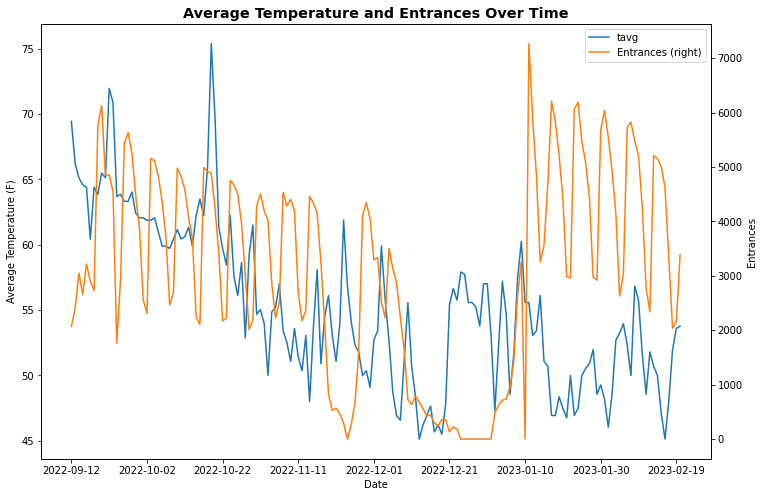

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

merged_daily.plot(x = 'Date', y = 'tavg', ax = ax) 
merged_daily.plot(x = 'Date', y = 'Entrances', ax = ax, secondary_y = True) 
plt.title("Average Temperature and Entrances Over Time", fontsize = 'x-large', fontweight = 'bold')
ax.set_ylabel('Average Temperature (F)')
ax.right_ax.set_ylabel('Entrances')

First, we created a time series plot with the average temperature in blue and the number of individuals who entered the Cal Poly Rec Center in orange. This graph shows no evident trend, the peaks are mostly on Mondays and non-peaks are mostly on the weekends. The trends for the entrances are fairly similar on a weekly basis, and it springs back up after the holidays, more specifically, succeeding New Year’s. However, the graph reveals the average temperature does not appear to affect the number of entrances, indicating no correlation between the average temperature and the number of individuals who entered the Cal Poly Rec Center. 

**Average Temperature vs Entrance for All Data**

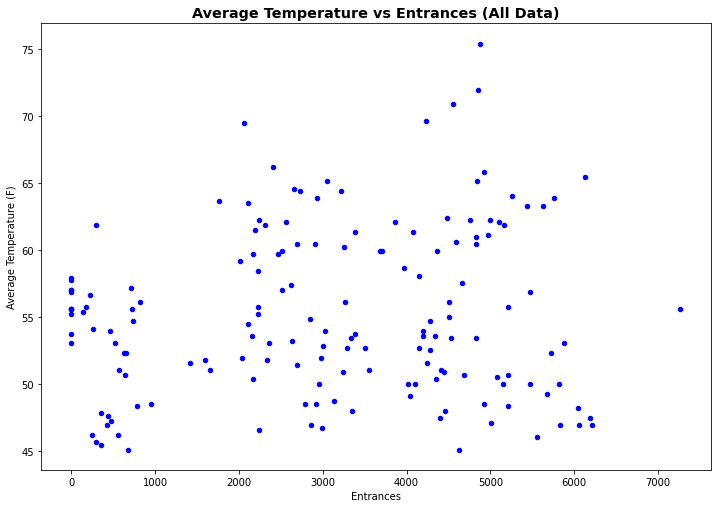

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_daily.plot.scatter(x='Entrances', y='tavg', c='Blue', ax = ax)
plt.title("Average Temperature vs Entrances (All Data)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
plt.ylabel("Average Temperature (F)")
plt.show()

The first scatterplot created contains all the data to understand the relationship between the average temperature and the number of individuals who entered the Cal Poly Rec Center. This scatterplot reveals that the points are scattered randomly, indicating that there is no relationship and no correlation between the average temperature in Fahrenheit and the number of individuals who entered the Cal Poly Rec Center.

**Average Temperature vs Entrance Accounting for Holidays and Weekends**

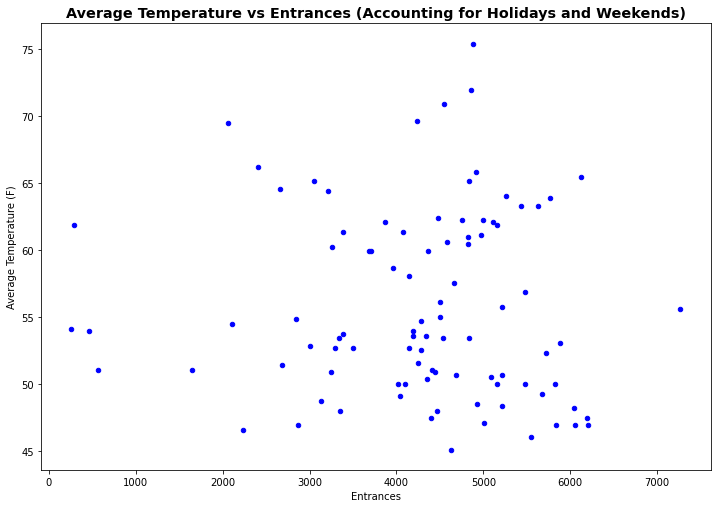

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_daily2.plot.scatter(x='Entrances', y='tavg', c='Blue', ax = ax)
plt.title("Average Temperature vs Entrances (Accounting for Holidays and Weekends)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
plt.ylabel("Average Temperature (F)")
plt.show()

Then we created another scatterplot with the dataset that accounts for holidays, weekends, and when the rec is closed. This scatterplot also reveals that the points are randomly scattered, indicating there is no relationship and no correlation between the average temperature in Fahrenheit and the number of individuals who entered the Cal Poly Rec Center.

##### **Pearsons Correlation With All Data**

In [ ]:
# Convert dataframe into series
Entrances = merged_daily['Entrances']
Temp = merged_daily['tavg']
 
# Apply the pearsonr()
corr, _ = pearsonr(Entrances, Temp)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.113


To further support our analysis, we conducted a Pearson's correlation test to measure the statistical relationship and association between the average temperature in Fahrenheit and the number of individuals who entered the Cal Poly Rec Center. 

First, we computed the test without removing any specific dates, resulting in a correlation value of 0.113. This indicates that there is a weak positive association between the average temperature in Fahrenheit and the number of individuals who entered the Cal Poly Rec Center.  However, this value is fairly close to 0, indicating that it is barely a positive association and if anything, no correlation. However, this fails to account for academic holidays, including Thanksgiving and Winter break, and when the rec center was closed. Thus, this would not be an accurate representation since the outliers of low or zero entrance data would skew our results.


##### **Pearsons Correlation: Daily Temperature and Entrances Accounting for Academic Holidays and Weekends**

In [ ]:
# Convert dataframe into series
Entrances3 = merged_daily3['Entrances']
Temp3 = merged_daily3['tavg']
 
# Apply the pearsonr()
corr, _ = pearsonr(Entrances3, Temp3)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.213


We repeated the test for the second dataset to account for holidays as well as weekends to account for the lower population of students who enter on non-school days. The result was a correlation value of 0.213, which increased by 0.1. However, this is still a low correlation value, indicating that there is a weak correlation between the average temperature in Fahrenheit and the number of individuals who entered the Cal Poly Rec Center.

Both of these correlation values are consistent with what we viewed in the scatterplots. Based on the scatterplots and Pearson's correlation test, we can conclude that a decrease in daily temperature is not correlated with an increase in the number of people who use the Cal Poly Rec Center. 


### **Hourly Temperature vs Entrances**

Text(0, 0.5, 'Entrances')

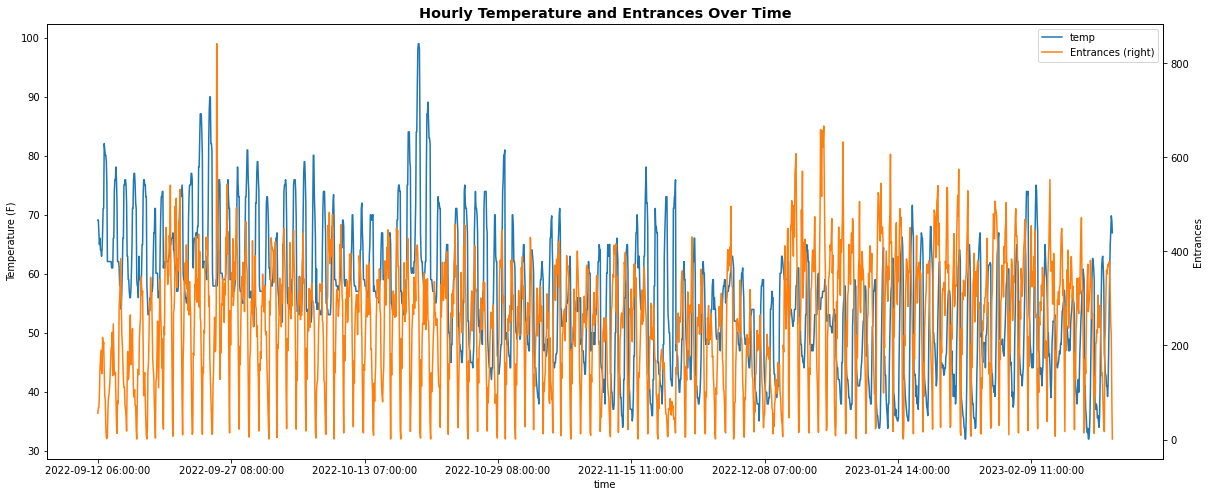

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

merged_hourly.plot(x = 'time', y = 'temp', ax = ax) 
merged_hourly.plot(x = 'time', y = 'Entrances', ax = ax, secondary_y = True) 
plt.title("Hourly Temperature and Entrances Over Time", fontsize = 'x-large', fontweight = 'bold')
ax.set_ylabel('Temperature (F)')
ax.right_ax.set_ylabel('Entrances')

At the hourly level, we created a time series plot with the average temperature in blue and the number of individuals who entered the Cal Poly Rec Center in orange. This graph appears to reveal no obvious trend. The peaks are mainly at 4-6 PM, 11 AM, and 2-3 PM and non-peaks are primarily at 5 AM, 10-11 PM, and 6-7 AM. The trends for the entrances are fairly similar on an hourly basis, and it springs back up after the holidays, more specifically, after New Year’s. However, we can see that the hourly temperature does not appear to affect the number of entrances, indicating there is essentially no correlation between the hourly temperature and the number of individuals who entered the Cal Poly Rec Center. 



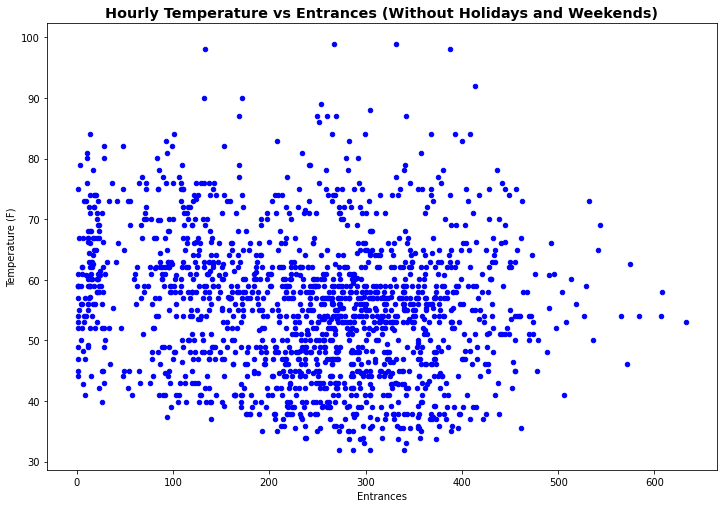

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_hourly2.plot.scatter(x='Entrances', y='temp', c='Blue', ax = ax)
plt.title("Hourly Temperature vs Entrances (Without Holidays and Weekends)", fontsize = 'x-large', fontweight = 'bold')
plt.ylabel("Temperature (F)")
plt.subplots_adjust(top = 0.90)
plt.show()

Then we created a scatterplot with the dataset that accounts for holidays and weekends and when the rec is closed for the hourly temperature level. This scatterplot reveals that the points are randomly scattered, indicating there is no relationship and no correlation between the hourly temperature and the number of individuals who entered the Cal Poly Rec Center.


##### **Pearsons Correlation: Hourly Temperature and Entrances Without Holidays and Weekends**

In [ ]:
Entrances = merged_hourly2['Entrances']
Temp = merged_hourly2['temp']
 
# Apply the pearsonr()
corr, _ = pearsonr(Entrances, Temp)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.162


To further support this analysis, we conducted a Pearson's correlation test to measure the statistical relationship and association between the hourly temperature and the number of individuals who entered the Cal Poly Rec Center for the hourly level. The result was a correlation value of -0.162, which decreased when measured on a daily level. However, this is a low correlation value, indicating that there is essentially no correlation between the hourly temperature and the number of individuals who entered the Cal Poly Rec Center


## **Rain vs Entrances**

### **Daily Entrances vs Rain**

Text(0, 0.5, 'Entrances')

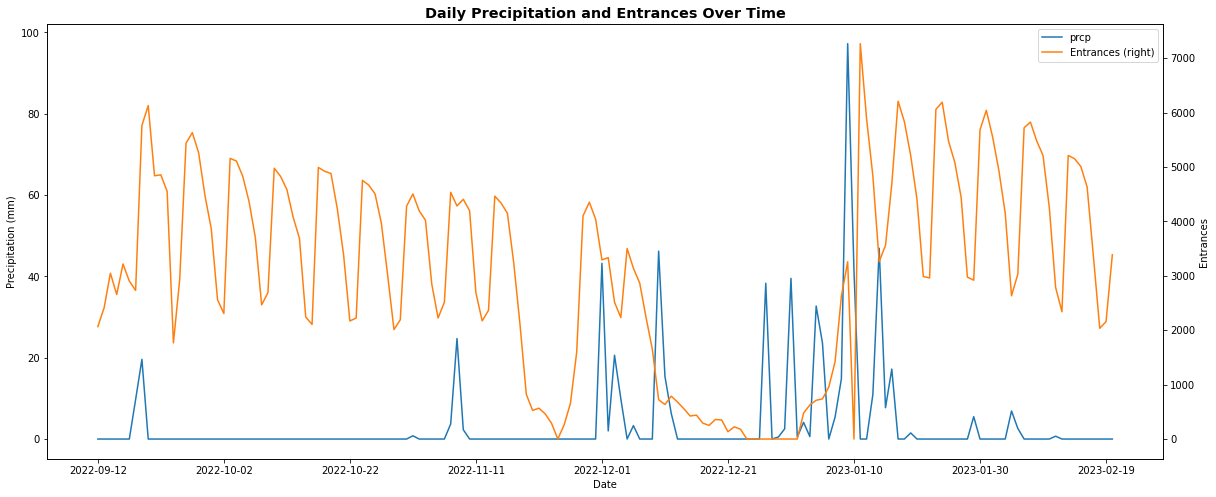

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

merged_daily.plot(x = 'Date', y = 'prcp', ax = ax) 
merged_daily.plot(x = 'Date', y = 'Entrances', ax = ax, secondary_y = True) 
plt.title("Daily Precipitation and Entrances Over Time", fontsize = 'x-large', fontweight = 'bold')
ax.set_ylabel('Precipitation (mm)')
ax.right_ax.set_ylabel('Entrances')

We created a time series plot with the precipitation in blue and the number of individuals who entered the Cal Poly Rec Center in orange. This graph illustrates no obvious trend. The peaks are mainly on Mondays and the non-peaks are predominantly on weekends. The trends for the entrances are fairly similar on a weekly basis, decreasing as the quarter progresses, and it springs back up after the holidays, more specifically, after New Year’s. However, the average temperature does not appear to affect the number of entrances, indicating there is essentially no correlation between the daily precipitation and the number of individuals who entered the Cal Poly Rec Center. 

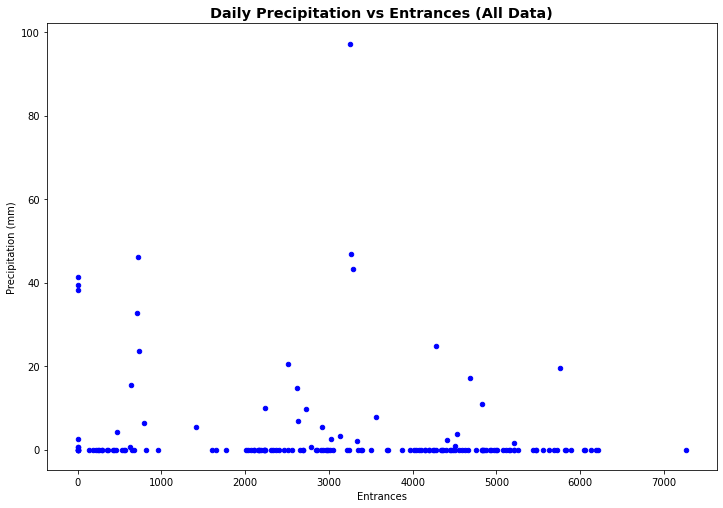

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_daily.plot.scatter(x='Entrances', y='prcp', c='Blue', ax = ax)
plt.title("Daily Precipitation vs Entrances (All Data)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
ax.set_ylabel('Precipitation (mm)')
plt.show()

The scatterplot illustrating all observations for daily precipitation vs entrances reveals many non-rainy days. Disregarding those observations, there appears to be no obvious pattern or trend. 


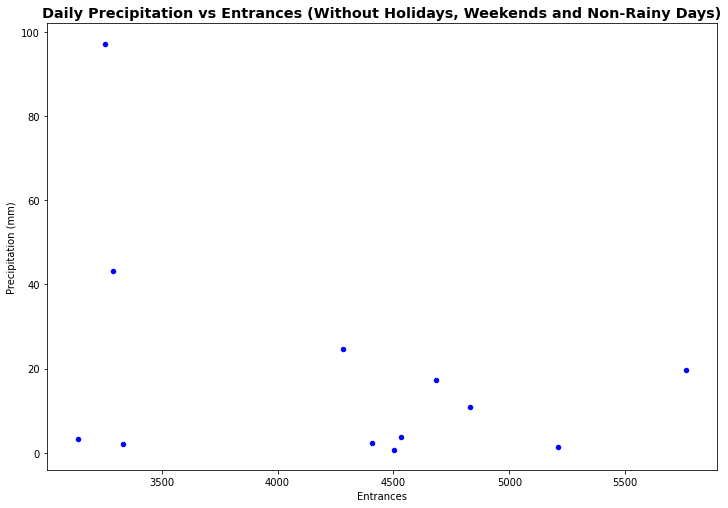

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_daily3.plot.scatter(x='Entrances', y='prcp', c='Blue', ax = ax)
plt.title("Daily Precipitation vs Entrances (Without Holidays, Weekends and Non-Rainy Days)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
ax.set_ylabel('Precipitation (mm)')
plt.show()

The scatterplot revealing observations without holidays, weekends, and non-rainy days leaves only 12 observations remaining. Again, there is no obvious pattern or trend. 	



##### **Pearsons Correlation: Daily Precipitation Without Holidays, Weekends and Non-Rainy Days**

In [ ]:
# Convert dataframe into series
Entrances3 = merged_daily3['Entrances']
Prcp3 = merged_daily3['prcp']
 
# Apply the pearsonr()
corr, _ = pearsonr(Entrances3, Prcp3)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.388


The Pearson’s correlation test measuring the correlation between daily entrances and precipitation results in a value of -0.388, indicating a weak negative association. However, we must take into account that the correlation is based on a small sample size of 12 observations. 

### **Hourly Rain vs Entrances**

Text(0, 0.5, 'Entrances')

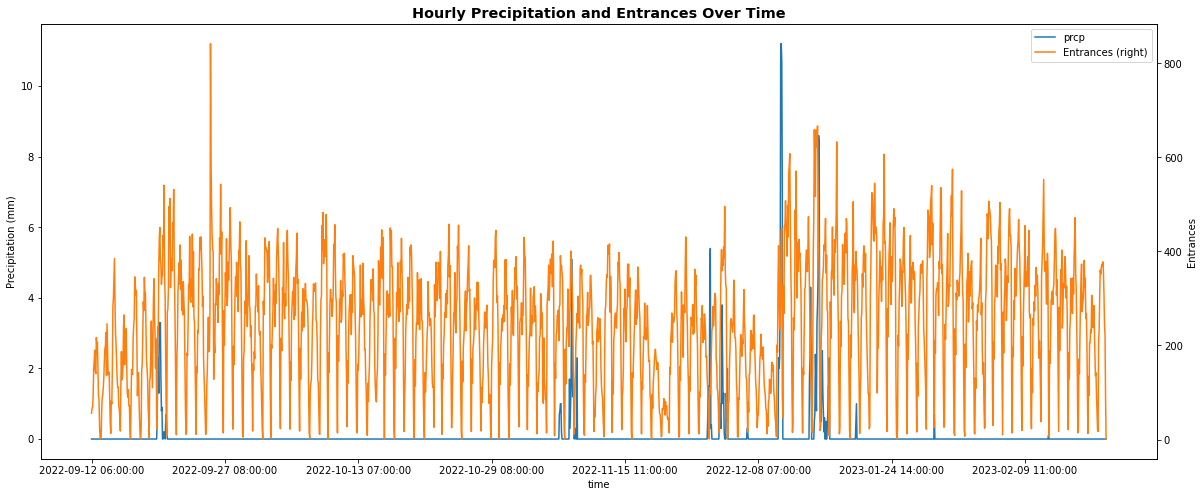

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

merged_hourly.plot(x = 'time', y = 'prcp', ax = ax) 
merged_hourly.plot(x = 'time', y = 'Entrances', ax = ax, secondary_y = True) 
plt.title("Hourly Precipitation and Entrances Over Time", fontsize = 'x-large', fontweight = 'bold')
ax.set_ylabel('Precipitation (mm)')
ax.right_ax.set_ylabel('Entrances')

For the hourly precipitation level, we additionally created a time series plot with the precipitation in blue and the number of individuals who entered the Cal Poly Rec Center in orange. This graph shows no noticeable trend. Since it is the same number of entrances as previously, the peaks are primarily at 4-6 PM, 11 AM, and 2-3 PM and non-peaks are predominantly at 5 AM, 10-11 PM, and 6-7 AM. The hourly precipitation does not appear to affect the number of entrances, indicating essentially no correlation.


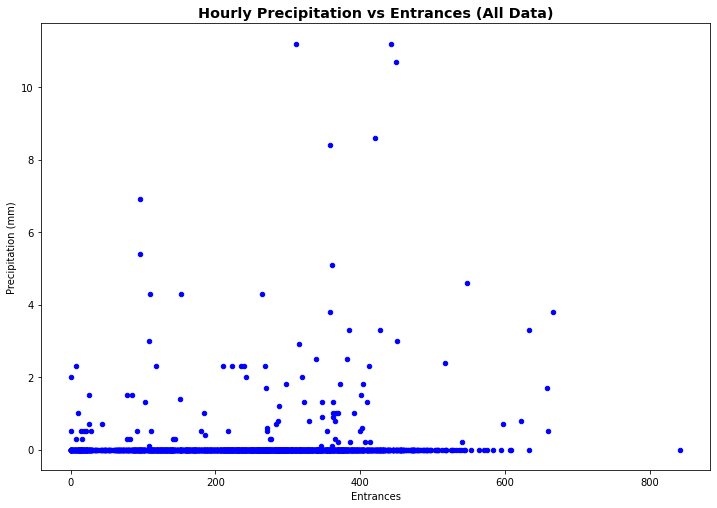

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_hourly.plot.scatter(x='Entrances', y='prcp', c='Blue', ax = ax)
plt.title("Hourly Precipitation vs Entrances (All Data)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
ax.set_ylabel('Precipitation (mm)')
plt.show()

In the scatterplot revealing hourly precipitation vs entrances for all observations, again, there appears to be many non-rainy days and reveals no obvious pattern or trend. 

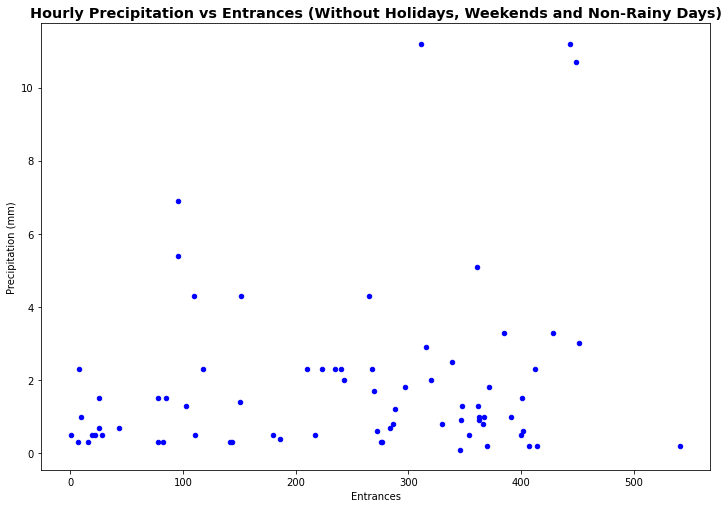

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = merged_hourly3.plot.scatter(x='Entrances', y='prcp', c='Blue', ax = ax)
plt.title("Hourly Precipitation vs Entrances (Without Holidays, Weekends and Non-Rainy Days)", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top = 0.90)
ax.set_ylabel('Precipitation (mm)')
plt.show()

The scatterplot revealing observations without holidays, weekends, and non-rainy days leaves only 12 observations remaining, and also illustrates no noticeable pattern or trend. 


##### **Pearsons Correlation: Hourly Precipitation Without Holidays, Weekends and Non-Rainy Days**

In [ ]:
# Convert dataframe into series
Entrances = merged_hourly3['Entrances']
Prcp = merged_hourly3['prcp']
 
# Apply the pearsonr()
corr, _ = pearsonr(Entrances, Prcp)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.190


The Pearson’s correlation test to measure the correlation between hourly entrances and precipitation results in a value of -0.190, indicating an extremely weak negative association, essentially indicating no association. 


## **Conclusion**

In conclusion, our analysis fails to support our hypothesis and concludes that a decrease in temperature is not correlated with an increase in the number of people who use the Cal Poly Rec Center, regardless of the level of granularity. Despite the more extreme weather this year, the temperature usually is steady in San Luis Obispo, with the range of temperature between 41°F to 78°F. Therefore, the weather is most likely not a factor in the number of people who use the Cal Poly Rec Center. 

Our analysis also indicates that, although based on only 12 observations, there is a weak negative association between daily precipitation and entrances. This again fails to support our hypothesis and concludes that an increase in rain is not associated with an increase in entrances. However, we need additional data for rainy days to fully comprehend the relationship between precipitation and the number of individuals who utilize the Cal Poly Rec Center. 

To expand our analysis, the Cal Poly Rec Center could obtain multiple years' worth of data to better understand the patterns and trends of students. This data can be valuable to analyze the busiest times, days of the week, and time of year, allowing Cal Poly ASI to better predict the congestion and how much staffing is required. 











